In [6]:
# Importing packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import yfinance as yf

In [7]:
sp500 = yf.Ticker("^GSPC") # using Ticker on the yf object created to intialize 'sp500' 
                           # initializing stock price predictions with S&P500 index

In [8]:
sp500 = sp500.history(period="max") # querying historical prices
                                    # querying all the prices from the very beginning

In [9]:
sp500 # returing a pandas df
      # each row is a shows the price of a single trading day
      # Using the attributes to predict if the stock prices will go up or down

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-28 00:00:00-04:00,4426.029785,4439.560059,4414.979980,4433.310059,2957230000,0.0,0.0
2023-08-29 00:00:00-04:00,4432.750000,4500.140137,4431.680176,4497.629883,3354820000,0.0,0.0
2023-08-30 00:00:00-04:00,4500.339844,4521.649902,4493.589844,4514.870117,3064110000,0.0,0.0


In [16]:
sp500.drop(["Dividends", "Stock Splits"], axis=1) # removing dividends and stock splits since these two 
                                                  # columns are only relevant to individual stocks information

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-08-28 00:00:00-04:00,4426.029785,4439.560059,4414.979980,4433.310059,2957230000
2023-08-29 00:00:00-04:00,4432.750000,4500.140137,4431.680176,4497.629883,3354820000
2023-08-30 00:00:00-04:00,4500.339844,4521.649902,4493.589844,4514.870117,3064110000


<AxesSubplot: xlabel='Date'>

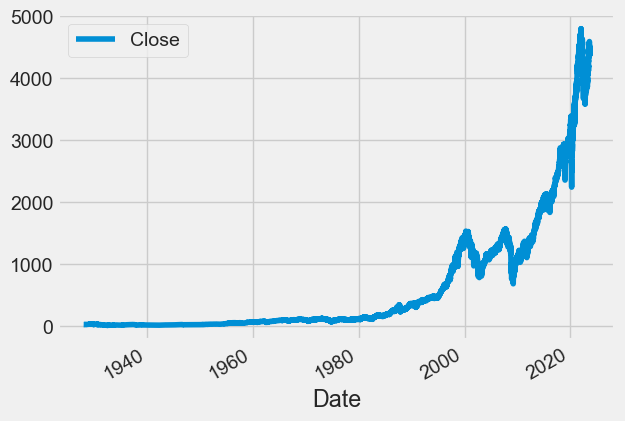

In [11]:
sp500.plot.line(y='Close', use_index= True) # historical trends of prices of S&P500 index

In [17]:
# Target 

sp500["Tomorrow"] = sp500["Close"].shift(-1) # took the Close column and shifts all the prices one day
                                             # - Example, price for 1927-12-30 = 17.66, whereas 
                                             #   1927-01-01 = 17.76

In [18]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000
...,...,...,...,...,...,...,...,...
2023-08-28 00:00:00-04:00,4426.029785,4439.560059,4414.979980,4433.310059,2957230000,0.0,0.0,4497.629883
2023-08-29 00:00:00-04:00,4432.750000,4500.140137,4431.680176,4497.629883,3354820000,0.0,0.0,4514.870117
2023-08-30 00:00:00-04:00,4500.339844,4521.649902,4493.589844,4514.870117,3064110000,0.0,0.0,4507.660156


In [19]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [20]:
sp500 # now has a Target column, which is what we are trying to predict

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000,0
...,...,...,...,...,...,...,...,...,...
2023-08-28 00:00:00-04:00,4426.029785,4439.560059,4414.979980,4433.310059,2957230000,0.0,0.0,4497.629883,1
2023-08-29 00:00:00-04:00,4432.750000,4500.140137,4431.680176,4497.629883,3354820000,0.0,0.0,4514.870117,1
2023-08-30 00:00:00-04:00,4500.339844,4521.649902,4493.589844,4514.870117,3064110000,0.0,0.0,4507.660156,0


In [23]:
sp500 = sp500.loc["1990-01-01 00:00:00-05:00":].copy() # taking the rows where the index is atleast 1990-01-01

In [24]:
sp500 # newly updated dataframe for to be trained on with Machine Learning model

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0.0,0.0,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0.0,0.0,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0.0,0.0,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0.0,0.0,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0.0,0.0,349.619995,0
...,...,...,...,...,...,...,...,...,...
2023-08-28 00:00:00-04:00,4426.029785,4439.560059,4414.979980,4433.310059,2957230000,0.0,0.0,4497.629883,1
2023-08-29 00:00:00-04:00,4432.750000,4500.140137,4431.680176,4497.629883,3354820000,0.0,0.0,4514.870117,1
2023-08-30 00:00:00-04:00,4500.339844,4521.649902,4493.589844,4514.870117,3064110000,0.0,0.0,4507.660156,0


In [26]:
from sklearn.ensemble import RandomForestClassifier  # can pick up no linear relationships which is useful
                                                     #    for predicting stock market prices 

# Creating a baseline model with RandomForestClassifer
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# spliting the train and test set
train = sp500.iloc[:-100]  # train = the first 100 rows
test = sp500.iloc[-100:]   # test = the rest of the rows

predictors = ["Close", "Volume", "Open", "High", "Low"]  # attributed to use predictions 
model.fit(train[predictors], train["Target"])            # training model to be able for using X to predict y


RandomForestClassifier(min_samples_split=100, random_state=1)

In [27]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])  # predicting the test set

In [28]:
import pandas as pd

preds = pd.Series(preds, index=test.index)  # converting to time series for better readability

In [29]:
precision_score(test["Target"], preds) # Baseline model accuracy 

0.5588235294117647

In [30]:
combined = pd.concat([test["Target"], preds], axis=1) # combining df

<AxesSubplot: xlabel='Date'>

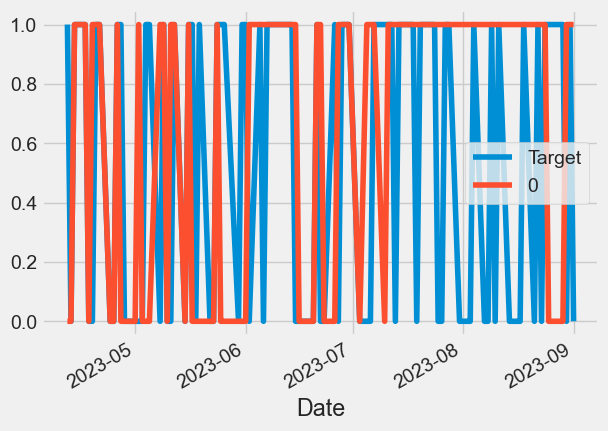

In [31]:
combined.plot() # plotting the difference of the Target and actual data
                # from between 2023-07 to 2023-08 up tunil the beginning of 2023-09, base model predicted prices to go up

In [ ]:
# Creating a more robust model from baseline

In [39]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [40]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []                         # list of data frames

    for i in range(start, data.shape[0], step):  # loop through the data year by year
        train = data.iloc[0:i].copy()            # train = all years prior to the current year
        test = data.iloc[i:(i+step)].copy()      # test = current year
        predictions = predict(train, test, predictors, model) # conduct RandomForest 
        all_predictions.append(predictions)      # append all the df into 'all_predictions'
    return pd.concat(all_predictions)            # return the all df in list

In [41]:
predictions = backtest(sp500, model, predictors)

In [42]:
predictions["Predictions"].value_counts()  # predicted that 3429 days going down
                                           # predicted that 2554 days going up

0    3429
1    2554
Name: Predictions, dtype: int64

In [43]:
precision_score(predictions["Target"], predictions["Predictions"]) # model is currently 53% accurate
                                                                   # Lay terms = if we say the market went up
                                                                   #             , it was correct 53% of time

0.5293657008613939

In [44]:
predictions["Target"].value_counts() / predictions.shape[0]  # this is providing the percentage of days when 
                                                             #   the market actually went up
                                                             # in percentage terms, model is performing worse
                                                             # Baseline model of RM shows consistency, can 
                                                             #    perform more robustness in model 
                                                            

1    0.533846
0    0.466154
Name: Target, dtype: float64

In [45]:
# adding in additional information to help improve model

horizons = [2, 5, 60, 250, 1000] # 2 days since price close, 5 days, 
new_predictors = []

for i in horizons:
    rolling_averages = sp500.rolling(i).mean()
    
    ratio_column = f"Close_Ratio_{i}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{i}"
    sp500[trend_column] = sp500.shift(1).rolling(i).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [48]:
sp500 = sp500.dropna()  # dopping NA values from dataframe

In [50]:
sp500.head() # days start in 1993-12-14
             # indicates that we need atleast 3 to 4 years worth of data for this model

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,0.0,0.0,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,0.0,0.0,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,0.0,0.0,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,0.0,0.0,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,0.0,0.0,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


In [51]:
# Updating Model by adding in more estimators, and decreasing the the number of min sample splits to lower influence

model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [52]:
# Updating predict function

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]   # changing it to predict_proba to give probability of predicting 0 or 1
    preds[preds >= 0.6] = 1  # changing the threshold of predicting a stock going up
    preds[preds < 0.6] = 0   # has to be at least 60% going up (Making model being more confident)
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [53]:
predictions = backtest(sp500, model, new_predictors)  # performing backtesting

In [54]:
# New predictions with added information and adjustments to model

predictions["Predictions"].value_counts()  # showing far more days of going down, then going up (buying stocks in fewer days)

0.0    4164
1.0     818
Name: Predictions, dtype: int64

In [55]:
precision_score(predictions["Target"], predictions["Predictions"]) # returning a 57% accuracy of predicted days going up
                                                                   # when only looking at time series day (historical prices)
                                                                   #   the model conducted a 57% accuracy of predicting prices
                                                                   #   of stocks going up
                                                                   # Compared to baseline, there is an improvement in accuracy from
                                                                   #   53% to 57%

0.5696821515892421

In [ ]:
# With more data engineering, the model's prediction accuracy of prices going up improved from 53% to 57%
# This model is limited to using only historical data through time series
# With additional information integrated into the model such as macroeconomic externalities, time adjustments based on 
#    location, and flucating interest rates, the model will improve in accuracy when predicting future stock prices
# THis model shows that even with limited information, a robust model can be built for predictions.